### graph convolutional networks

[source](https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780)

In [1]:
import numpy as np
import networkx as nx
import tensorflow as tf
%matplotlib inline

In [2]:
def beautiful_nx(g):
    """A wrapper to draw graph nets beautifully.

    Args:
        g: a networkx graph object.

    Source:
        https://gist.github.com/jg-you/144a35013acba010054a2cc4a93b07c7.js
    """
    import copy
    import networkx as nx
    import matplotlib.pyplot as plt 

    pos = nx.layout.spectral_layout(g)
    pos = nx.spring_layout(g, pos=pos, iterations=50)

    pos_shadow = copy.deepcopy(pos)
    shift_amount = 0.006
    for idx in pos_shadow:
        pos_shadow[idx][0] += shift_amount
        pos_shadow[idx][1] -= shift_amount

    fig = plt.figure(frameon=False)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')

    nx.draw_networkx_nodes(g, pos_shadow, node_color='k', alpha=0.5)
    nx.draw_networkx_nodes(g, pos, node_color="#3182bd", linewidths=1)
    nx.draw_networkx_edges(g, pos, width=1)
    return None

In [3]:
# adjacency matrix
A = np.matrix([
    [0, 1, 0, 0],
    [0, 0, 1, 1], 
    [0, 1, 0, 0],
    [1, 0, 1, 0]],
    dtype=float)

# feature matrix
X = np.matrix([
    [i, -i] for i in range(A.shape[0])], 
    dtype=float)
print(A)
print()
print(X)

[[0. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 0.]]

[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


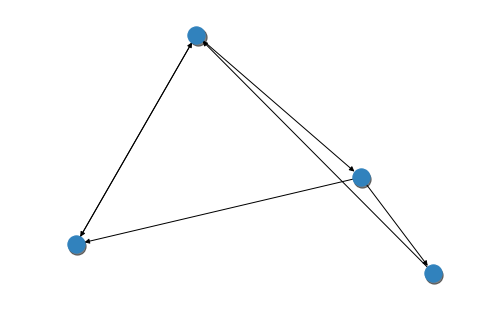

In [4]:
G = nx.DiGraph(A)
beautiful_nx(G)

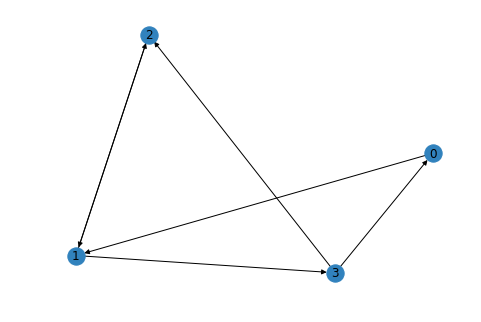

In [5]:
nx.draw(G, with_labels=True, node_color="#3182bd")

### A Simple Propagation Rule

In [6]:
# resulted hidden layer
A * X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

### Adding Self-Loops

In [7]:
I = np.matrix(np.eye(A.shape[0]))
A_hat = A + I

print(I)
print()
print(A_hat)
print()

# resulted hidden layer
print(A_hat * X)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[1. 1. 0. 0.]
 [0. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 0. 1. 1.]]

[[ 1. -1.]
 [ 6. -6.]
 [ 3. -3.]
 [ 5. -5.]]


### Normalizing the Feature Representations

In [8]:
# degree matrix
D = np.array(np.sum(A, axis=0))[0]
D = np.matrix(np.diag(D))

print(D)
print()

# normalized 
print(D**-1 * A)

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]

[[0.  1.  0.  0. ]
 [0.  0.  0.5 0.5]
 [0.  0.5 0.  0. ]
 [1.  0.  1.  0. ]]


In [ ]:
np.power(np.sum(A))

In [9]:
# apply the propagation rule with the transformed adjacency matrix
print(D**-1 * A * X)

[[ 1.  -1. ]
 [ 2.5 -2.5]
 [ 0.5 -0.5]
 [ 2.  -2. ]]


### Adding back the Weights

In [10]:
# weights matrix
W = np.matrix([
    [1, -1],
    [-1, 1]])

D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

print(D_hat)
print()
print(D_hat**-1 * A_hat * X * W)

[[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 2.]]

[[ 1. -1.]
 [ 4. -4.]
 [ 2. -2.]
 [ 5. -5.]]


### Adding an Activation Function

In [11]:
# resulted layer
hidden = tf.nn.relu(D_hat**-1 * A_hat * X * W)

with tf.Session() as sess:
    sess.run(hidden)
    print(hidden.eval())

[[1. 0.]
 [4. 0.]
 [2. 0.]
 [5. 0.]]


### data preparation

In [2]:
import pandas as pd

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'
data = 'round1_ijcai_18_train_20180301.txt'

data = pd.read_csv(wd+data, sep=' ')

In [3]:
pd.set_option('display.max_columns', 100)
data.head()

,instance_id,item_id,item_category_list,item_property_list,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,user_age_level,user_occupation_id,user_star_level,context_id,context_timestamp,context_page_id,predict_category_property,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
0,108641074714126964,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,1003,2005,3003,282924576738839389,1537236544,4006,5799347067982556520:-1;509660095530134768:-1;5...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
1,5754713551599725161,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,1002,2005,3006,4007979028023783431,1537243232,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
2,842679481291040981,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,1003,2005,3004,4884875192608989870,1537211052,4001,5799347067982556520:5131280576272319091;725801...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
3,937088850059189027,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,1004,2005,3006,840119421106178602,1537222670,4016,509660095530134768:-1;5799347067982556520:-1;7...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0
4,7975697065017708072,3412720377098676069,7908382889764677758;5799347067982556520,2072967855524022579;5131280576272319091;263639...,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,1002,2005,3001,1736769971710354684,1537271320,4001,5799347067982556520:9172976955054793469;790838...,6765930309048922341,4,1.0,5002,1.0,1.0,1.0,0


In [4]:
data.shape

(478138, 27)

In [5]:
edgelist = pd.DataFrame()
edgelist['user_id'] = data.user_id
edgelist['item_id'] = data.item_id

In [6]:
target = 'is_trade'
features = ['item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 
            'user_gender_id', 'user_age_level', 'user_occupation_id', 'user_star_level', 
            'shop_review_num_level', 'shop_review_positive_rate', 'shop_score_service', 'shop_score_delivery', 'shop_score_description']
sourcetarget = ['user_id', 'item_id']

In [7]:
df_target = data[sourcetarget+[target]].groupby(sourcetarget ,as_index=False).sum()

In [8]:
df_target.head()

,user_id,item_id,is_trade
0,24779788309075,3429903120089063586,0
1,24779788309075,5649087492658319596,0
2,36134987234568,914111419274964265,0
3,59341486148291,2454479696539099260,0
4,179317972644611,61914655744894283,0


In [9]:
df_features = data[sourcetarget+features].groupby(sourcetarget, as_index=False).mean()

In [10]:
df_features.head()

,user_id,item_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,user_age_level,user_occupation_id,user_star_level
0,24779788309075,3429903120089063586,4.0,11.0,11.0,14.0,0.0,1004.0,2002.0,3007.0
1,24779788309075,5649087492658319596,5.0,12.0,12.0,18.0,0.0,1004.0,2002.0,3007.0
2,36134987234568,914111419274964265,4.0,10.0,10.0,16.0,1.0,1003.0,2002.0,3005.0
3,59341486148291,2454479696539099260,9.0,12.0,15.0,18.0,0.0,1004.0,2002.0,3007.0
4,179317972644611,61914655744894283,7.0,11.0,11.0,20.0,0.0,1003.0,2005.0,3003.0


In [11]:
df_target.shape[0]

444257

In [12]:
df_features.shape[0]

444257

In [13]:
df = df_target.merge(df_features, how='left', on=sourcetarget)

In [14]:
df.head()

,user_id,item_id,is_trade,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_gender_id,user_age_level,user_occupation_id,user_star_level
0,24779788309075,3429903120089063586,0,4.0,11.0,11.0,14.0,0.0,1004.0,2002.0,3007.0
1,24779788309075,5649087492658319596,0,5.0,12.0,12.0,18.0,0.0,1004.0,2002.0,3007.0
2,36134987234568,914111419274964265,0,4.0,10.0,10.0,16.0,1.0,1003.0,2002.0,3005.0
3,59341486148291,2454479696539099260,0,9.0,12.0,15.0,18.0,0.0,1004.0,2002.0,3007.0
4,179317972644611,61914655744894283,0,7.0,11.0,11.0,20.0,0.0,1003.0,2005.0,3003.0


### tensorflow impletementation

In [15]:
import numpy as np
import tensorflow as tf
import networkx as nx

In [32]:
from tensorflow.contrib.layers import dropout
from tensorflow.contrib.layers import fully_connected

In [233]:
tf.reset_default_graph()

learning_rate = 0.01

x = tf.placeholder(tf.float32, shape=(N, P))
y = tf.placeholder(tf.float32, shape=(N, T))

w1 = tf.Variable(tf.truncated_normal([P, T], stddev=0.01), dtype=tf.float32)
b1 = tf.Variable(tf.truncated_normal([N, T], stddev=0.01), dtype=tf.float32)

logits = tf.add(tf.matmul(tf.matmul(A_norm, x), w1), b1)
y_predict = tf.nn.sigmoid(logits)

loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

pred_labels = tf.argmax(y_predict, axis=1)

In [231]:
x_ = np.eye(N, dtype=np.float32)

In [234]:
epochs = 10
verbose = 1
loss_ls = []

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        sess.run(train_op, feed_dict={x: X, y: L})
        if verbose <= 0:
            pass
        elif epoch % verbose == 0:
            err = loss_op.eval(feed_dict={x: X, y: L})
            loss_ls.append(err)
            print(epoch, '\tloss: %.6f' %err)

0 	loss: nan
1 	loss: nan
2 	loss: nan
3 	loss: nan
4 	loss: nan
5 	loss: nan
6 	loss: nan
7 	loss: nan
8 	loss: nan
9 	loss: nan


In [16]:
def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)), dtype=np.int32)
    return labels_onehot

def adj_restructure(adj):
    adj = adj + np.eye(adj.shape[0])
    d = np.diagflat(np.power(np.array(adj.sum(1)), -1))
    a_norm = d.dot(adj)
    return a_norm

In [ ]:
g = nx.from_pandas_edgelist(edgelist, source=edgelist.columns[0], target=edgelist.columns[1], create_using=nx.MultiGraph())

a = adj_restructure(nx.to_numpy_matrix(g))

In [239]:
nodecol = 'user_id'

df_node = pd.DataFrame({nodecol: g.nodes()})
df_node = df_node.merge(df, how='left', on=nodecol)

x = df_node[features]
y = encode_onehot(list(df_node[target]))

In [240]:
n_nodes = g.number_of_nodes()
n_featues = len(features)
n_classes = y.shape[1]

In [244]:
keep_prob = 0.5
learning_rate = 0.001

n_epochs = 100
verbose = 10
loss_ls = []

In [242]:
def graph_convolution(a, x, w):
    with tf.name_scope('gcn_layer'):
        kernel = tf.matmul(x, w)
        return tf.nn.relu(tf.matmul(a, kernel))

In [243]:
adjacency = tf.placeholder(tf.float32, shape=(n_nodes, n_nodes))
features = tf.placeholder(tf.float32, shape=(n_nodes, n_featues))
labels = tf.placeholder(tf.float32, shape=(n_nodes, n_classes))

weights = tf.Variable(tf.random_normal([n_featues, n_classes], stddev=1))
    
hidden1 = graph_convolution(a=adjacency, x=features, w=weights)
hidden2 = dropout(hidden1, keep_prob=keep_prob)
output = tf.nn.softmax(hidden2, axis=n_classes)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [1]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        training_op.run(feed_dict={adjacency: a, features: x, labels: y})
        if verbose <= 0:
            pass
        elif epoch % verbose == 0:
            err = loss.eval(feed_dict={adjacency: a, features: x, labels: y})
            loss_ls.append(err)
            print(epoch, '\tloss: %.6f' %err)

NameError: name 'tf' is not defined